In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
import io 
df = pd.read_csv(io.BytesIO(uploaded['diabetes_data_upload.csv']))
df

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


Age  Gender Polyuria Polydipsia  ... musclestiffness Alopecia Obesity    Target
0     40    Male       No        Yes  ...             Yes      Yes     Yes  Positive
1     58    Male       No         No  ...              No      Yes      No  Positive
2     41    Male      Yes         No  ...             Yes      Yes      No  Positive
3     45    Male       No         No  ...              No       No      No  Positive
4     60    Male      Yes        Yes  ...             Yes      Yes     Yes  Positive
..   ...     ...      ...        ...  ...             ...      ...     ...       ...
515   39  Female      Yes        Yes  ...              No       No      No  Positive
516   48  Female      Yes        Yes  ...              No       No      No  Positive
517   58  Female      Yes        Yes  ...             Yes       No     Yes  Positive
518   32  Female       No         No  ...              No      Yes      No  Negative
519   42    Male       No         No  ...              No       No      No  Negative

[520 rows x 17 columns]

In [3]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder() #Label encoding
df['Gender']=label_enco.fit_transform(df['Gender'])
df['Polyuria']=label_enco.fit_transform(df['Polyuria'])
df['Polydipsia']=label_enco.fit_transform(df['Polydipsia'])
df['suddenweightloss']=label_enco.fit_transform(df['suddenweightloss'])
df['weakness']=label_enco.fit_transform(df['weakness'])
df['Polyphagia']=label_enco.fit_transform(df['Polyphagia'])
df['Genitalthrush']=label_enco.fit_transform(df['Genitalthrush'])
df['visualblurring']=label_enco.fit_transform(df['visualblurring'])
df['Itching']=label_enco.fit_transform(df['Itching'])
df['Irritability']=label_enco.fit_transform(df['Irritability'])
df['delayedhealing']=label_enco.fit_transform(df['delayedhealing'])
df['partialparesis']=label_enco.fit_transform(df['partialparesis'])
df['musclestiffness']=label_enco.fit_transform(df['musclestiffness'])
df['Alopecia']=label_enco.fit_transform(df['Alopecia'])
df['Obesity']=label_enco.fit_transform(df['Obesity'])
df['Target']=label_enco.fit_transform(df['Target'])


In [25]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.iloc[:,0:16].values
Y = df.iloc[:,16].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

#define the keras models
model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12,activation ='relu'))


model.add(Dense(6, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation ='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 14)                238       
_________________________________________________________________
dense_38 (Dense)             (None, 12)                180       
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 5         
Total params: 801
Trainable params: 801
Non-trainable params: 0
________________________________________________________

In [26]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

#fit the keras model on the dataset
history=model.fit(X,Y,validation_split=0.20,epochs=500, batch_size=50 )

#evaluate the keras model
_,accuracy = model.evaluate(x_train,y_train)
print('Train Accuracy: %.2f' % (accuracy*100))
predictions = model.predict_classes(x_train)

_,accuracy = model.evaluate(x_test,y_test)
print('Test Accuracy: %.2f' % (accuracy*100))
predictions = model.predict_classes(x_test)


# summarize the first 15 cases
for i in range(15):
	print('%s => %d (expected %d)' % (x_test[i].tolist(), predictions[i], y_test[i]))


Epoch 1/500
9/9 [==============================] - 1s 29ms/step - loss: 0.7664 - accuracy: 0.3396 - val_loss: 0.6973 - val_accuracy: 0.4615
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6982 - accuracy: 0.4249 - val_loss: 0.6893 - val_accuracy: 0.5385
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6713 - accuracy: 0.6347 - val_loss: 0.7092 - val_accuracy: 0.5385
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6665 - accuracy: 0.6150 - val_loss: 0.7077 - val_accuracy: 0.5385
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6479 - accuracy: 0.6462 - val_loss: 0.7228 - val_accuracy: 0.5385
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.6112 - val_loss: 0.7004 - val_accuracy: 0.5385
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.6444 - val_loss: 0.7033 - val_accuracy: 0.5385
Epoch 8/500
9/9 [========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[50, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0] => 1 (expected 1)
[69, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1] => 1 (expected 1)
[54, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0] => 0 (expected 0)
[37, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0] => 0 (expected 1)
[72, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0] => 0 (expected 0)
[62, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1] => 1 (expected 1)
[33, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] => 1 (expected 1)
[38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] => 1 (expected 1)
[45, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0] => 1 (expected 1)
[59, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1] => 0 (expected 0)
[70, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0] => 1 (expected 1)
[35, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0] => 1 (expected 1)
[55, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1] => 1 (expected 1)
[65, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0] => 0 (expected 0)
[43, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0

In [27]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print(classification_report(y_test,predictions ))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.97      0.98        65

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



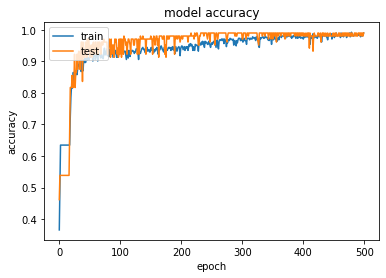

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

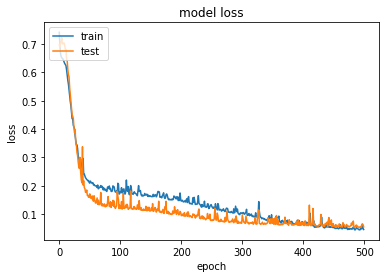

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()